# Supermarket Dataset

## Description

**Invoice id:** Computer generated invoice number

**Branch:** Branch of supercenter (3 branches are available identified by A, B and C).

**City:** Location of supercenters

**Customer type:**
Type of customers, recorded by Members for customers using member card and Normal for without member card.

**Gender:** Gender type of customer

**Product line:** General item categorization groups -
              Electronic accessories, 
              Fashion accessories, 
             Food and beverages, 
             Health and beauty, 
              Home and lifestyle, 
              Sports and travel
              
**Unit price:** Price of each product in dollor

**Quantity:** Number of products purchased by customer

**Tax 5%:** tax fee for customer buying

**Total:** Total price including tax

**Date:** Date of purchase (Record available from January 2019 to March 2019)

**Time:** Purchase time (10am to 9pm)

**Payment:** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

**COGS:** Cost of goods sold

**Gross margin percentage:** Gross margin percentage

**Gross income:** Gross income

**Rating:** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

## Improting required libraries

In [31]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno as msno
sns.set(rc={'figure.figsize':(15,10)})

In [2]:
#Reading the dataset given
market = pd.read_csv("supermarket_sales.csv")

## Observing the dataset

In [3]:
market.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [4]:
market.tail(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,3/22/2019,19:06,Credit card,282.80,4.761905,14.1400,4.5
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.3000,804.3000,1/24/2019,18:10,Ewallet,766.00,4.761905,38.3000,6.0
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,3/10/2019,20:46,Ewallet,116.06,4.761905,5.8030,8.8
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.7450,183.6450,2/22/2019,18:35,Ewallet,174.90,4.761905,8.7450,6.6
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


## Checking the null values

In [5]:
#Checking Null values
market.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

<AxesSubplot:>

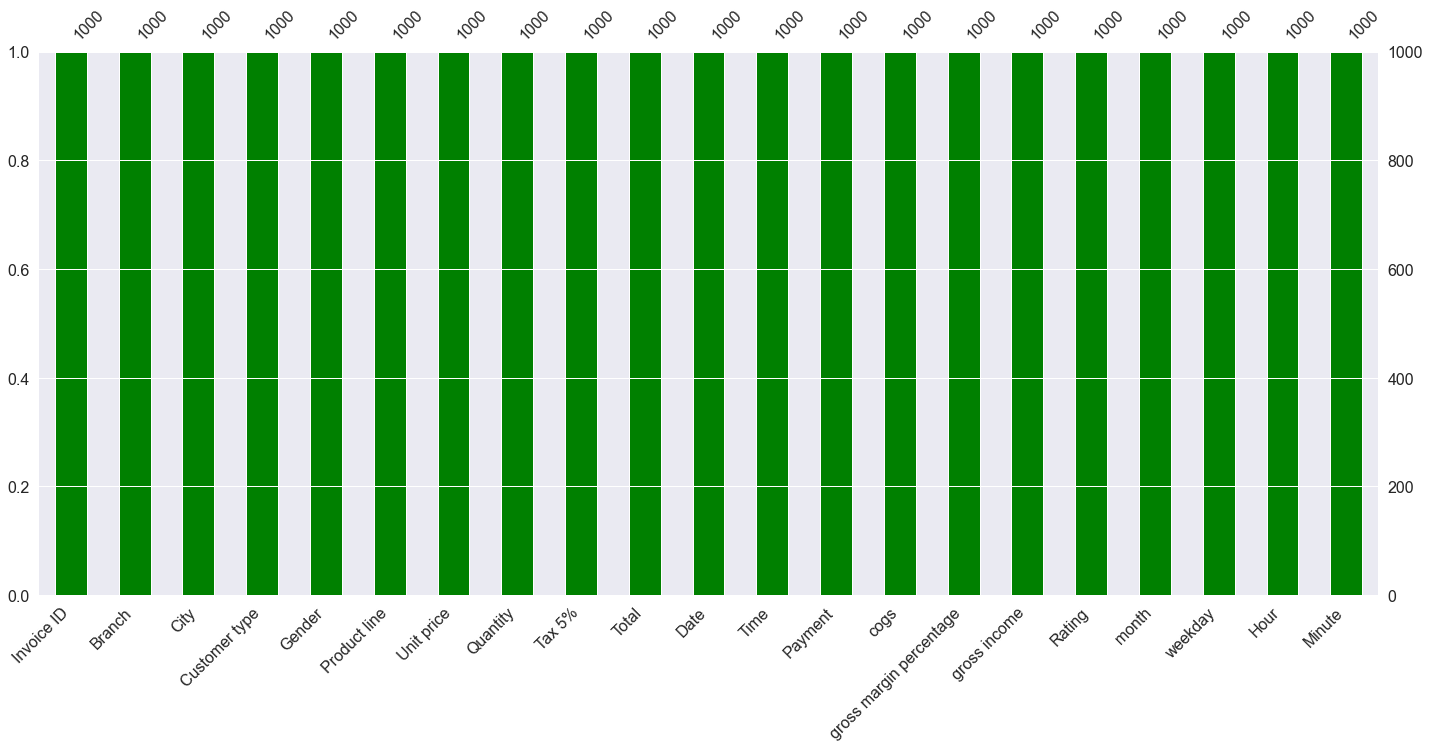

In [97]:
#Analysing missing value 
msno.bar(market, color='green')

## Conclusion 

As we can see, there is no missing values in any column

## Observing total numbers of rows and cloumns  

In [7]:
market.shape

(1000, 17)

- **Observing Columns**

In [8]:
market.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

- **Checking number of unique in each column**

In [9]:
market.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

## Finding Datatypes

In [10]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

- **Changing data types of the features**

In [11]:
catagorical = ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender','Product line', 'Quantity', 'Time', 'Payment']
for i in catagorical:
    market[i] = market[i].astype('category')

In [12]:
market['Date'] = pd.to_datetime(market['Date'])

In [13]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   category      
 1   Branch                   1000 non-null   category      
 2   City                     1000 non-null   category      
 3   Customer type            1000 non-null   category      
 4   Gender                   1000 non-null   category      
 5   Product line             1000 non-null   category      
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   category      
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   category      
 12  Payment                  1000 non-n

## Date - Time correction

In [14]:
market['month'] = market['Date'].dt.month
market['weekday'] = market['Date'].dt.day_name()
market[ ['Hour', 'Minute']] = market['Time'].str.split(':', expand=True)

## Examining distrbutions between variables

In [15]:
numeric = ['Unit price', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']

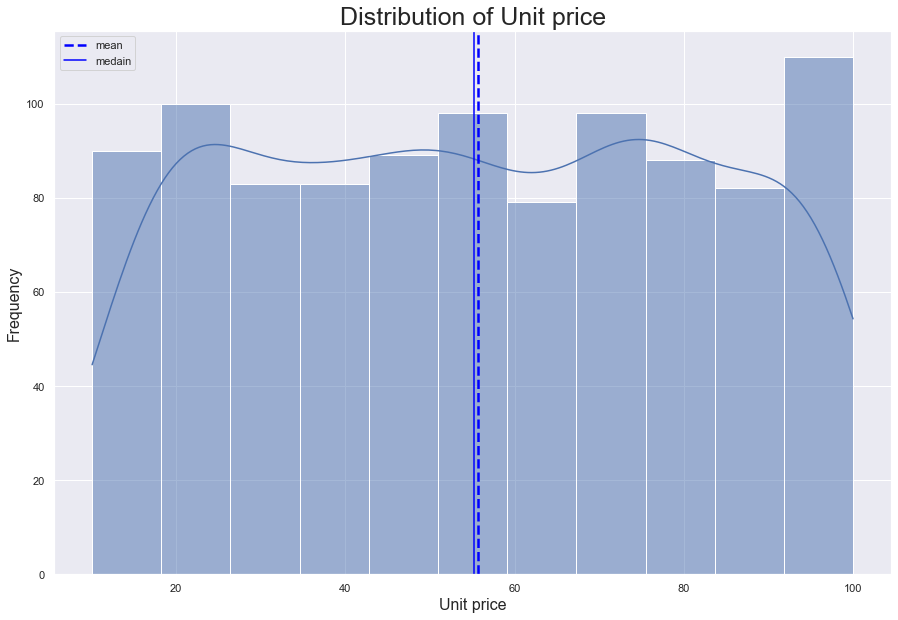

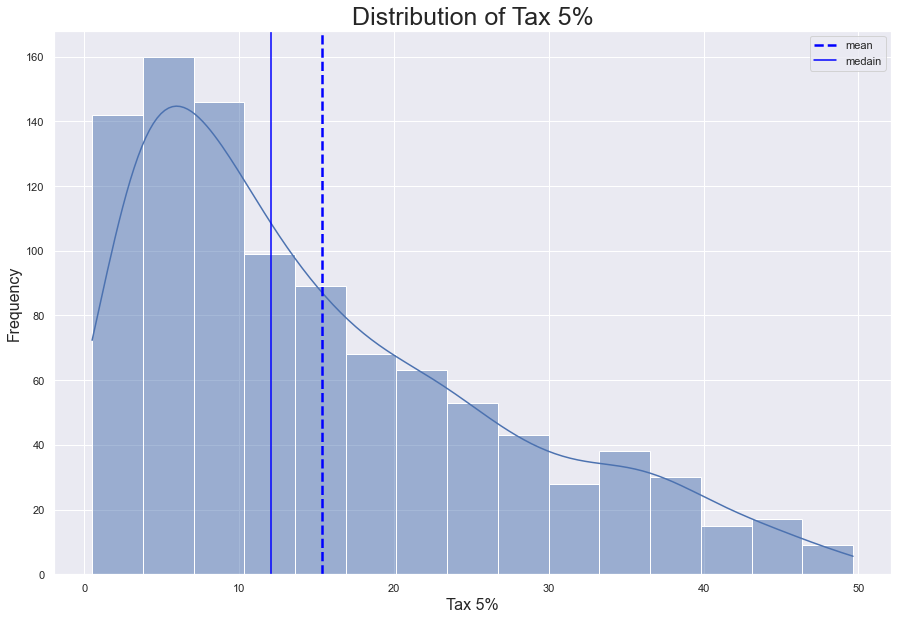

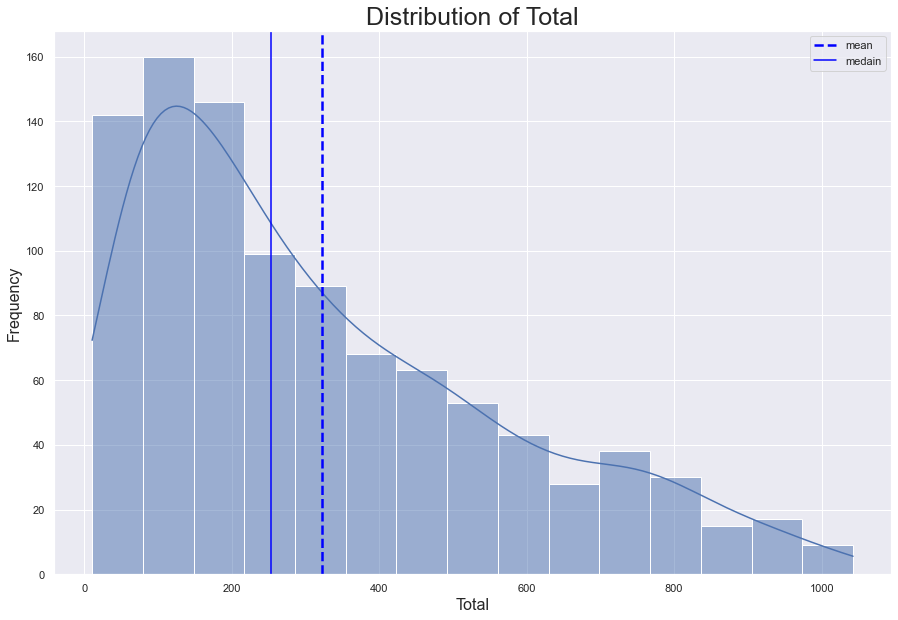

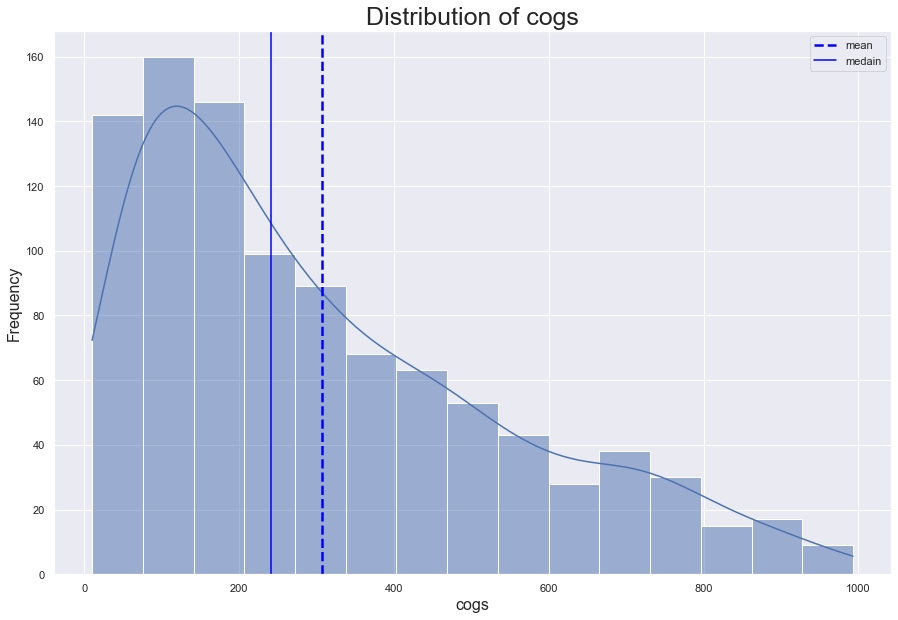

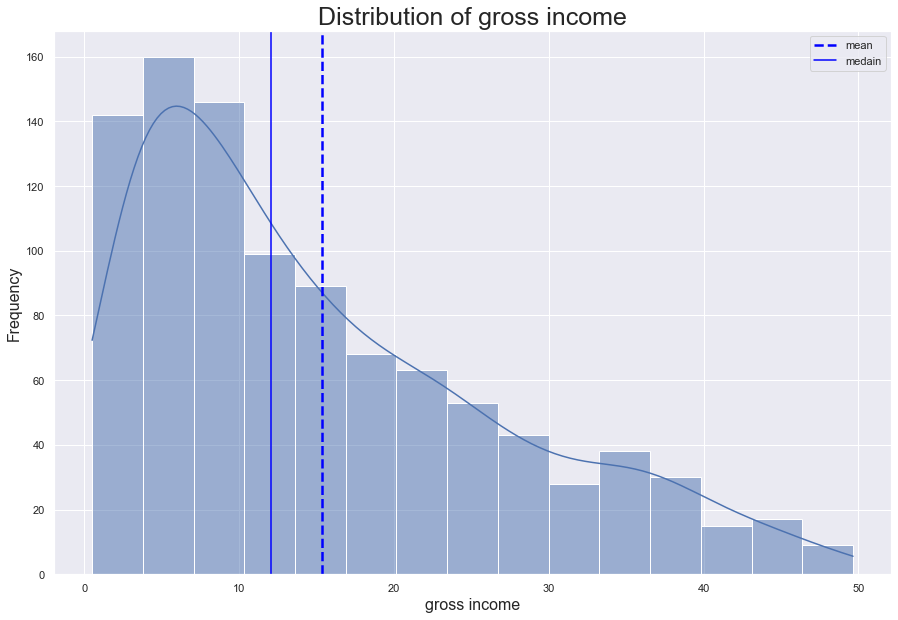

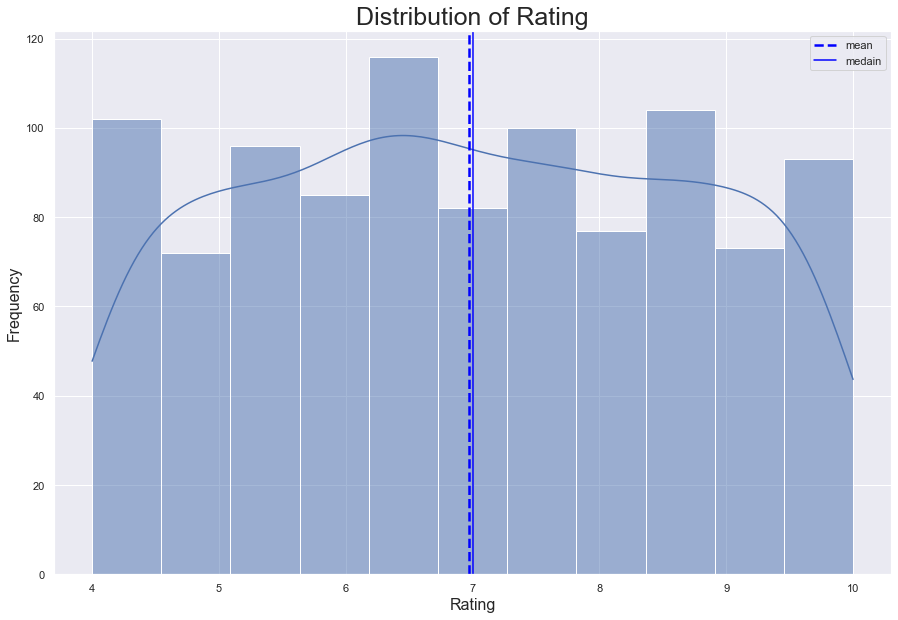

In [92]:
for i in numeric:
    fig, ax = plt.subplots(1,1)
    sns.histplot(market[i],kde=True,edgecolor = 'white')
    plt.title('Distribution of %s'%(i), fontsize=25)
    plt.axvline(x=market[i].mean(),ls='--',lw=2.5, color='blue',label='mean')
    plt.axvline(x=market[i].median(), color='blue',label='medain')
    plt.legend()
    plt.xlabel(i, fontsize=16)
    plt.ylabel('Frequency', fontsize=16)

### Conclusion

**Unit Price:** Normally distributed

**Tax 5%:** Right Tail skewed

**Total:** Right Tail skewed

**Cogs:** Right Tail skewed

**Gross income:** Right Tail skewed

**Rating:** Normally distributed

## Examining the outliers of the variables

<AxesSubplot:xlabel='Rating'>

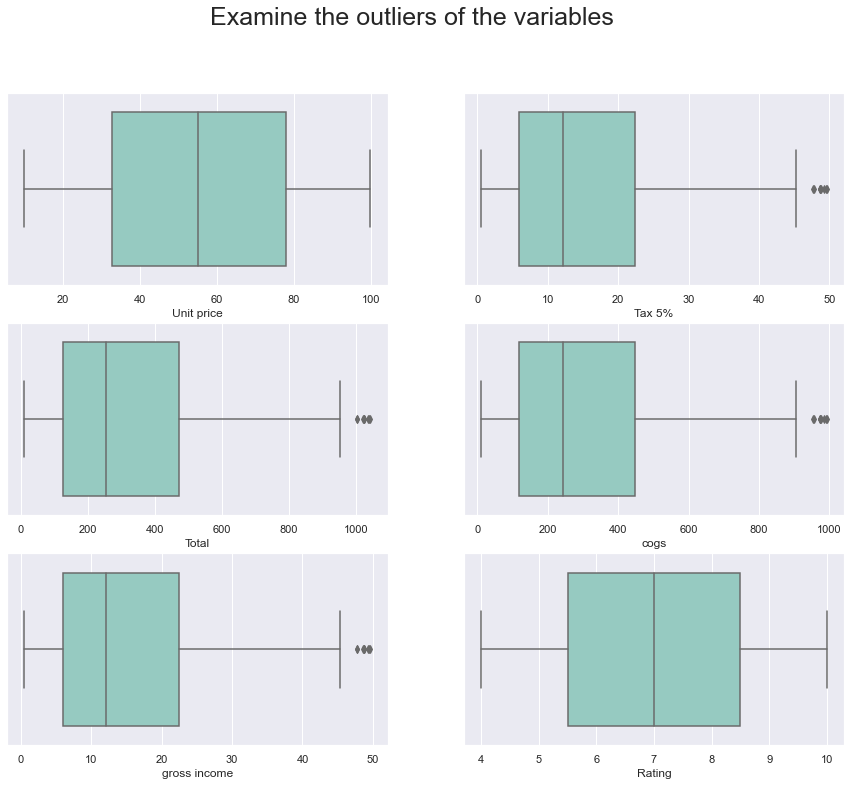

In [77]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
 
fig.suptitle('Examine the outliers of the variables', fontsize=25)

sns.boxplot(x = market['Unit price'], ax=axes[0, 0], palette='Set3')
sns.boxplot(x = market['Tax 5%'], ax=axes[0, 1], palette='Set3')
sns.boxplot(x = market['Total'], ax=axes[1, 0], palette='Set3')
sns.boxplot(x = market['cogs'], ax=axes[1, 1], palette='Set3')
sns.boxplot(x = market['gross income'], ax=axes[2, 0], palette='Set3')
sns.boxplot(x = market['Rating'], ax=axes[2, 1], palette='Set3')

### Conclusion

**Having Outliers:** Tax 5%, Total, cogs, gross income

**Not Having Outliers:** Unit price, Rating

## Statistical Summury of Dataset

In [40]:
market.describe()

,Unit price,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,month
count,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000
mean,55.672130,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,1.993000
std,26.494628,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,0.835254
min,10.080000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000
25%,32.875000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,1.000000
50%,55.230000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,2.000000
75%,77.935000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,3.000000
max,99.960000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,3.000000


## Corelaion

In [41]:
market.corr()

,Unit price,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,month
Unit price,1.000000,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,-0.027387
Tax 5%,0.633962,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.022301
Total,0.633962,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.022301
cogs,0.633962,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.022301
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.022301
Rating,-0.008778,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.042880
month,-0.027387,-0.022301,-0.022301,-0.022301,NaN,-0.022301,-0.042880,1.000000


## Is your supermarket more popular with males or females? 

Text(0, 0.5, 'Frequency')

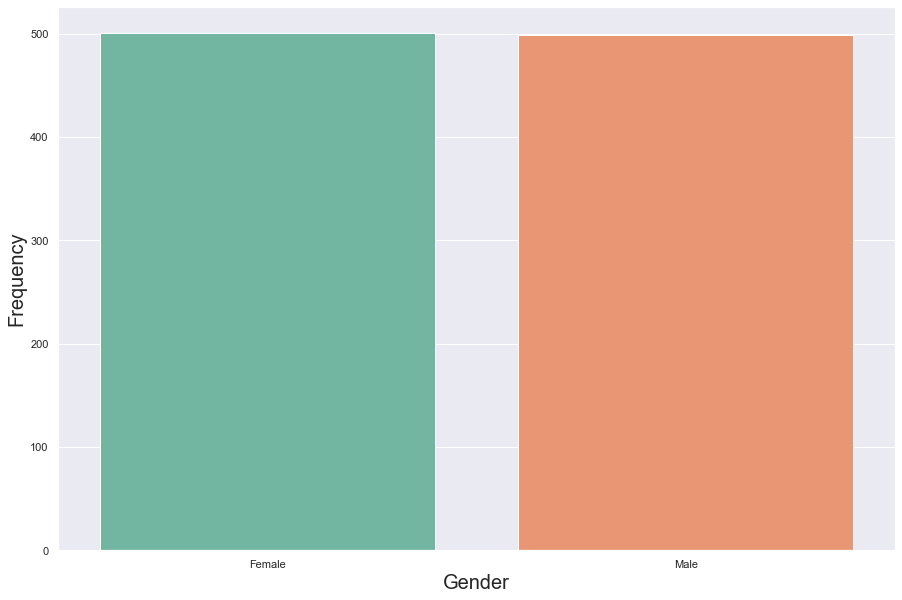

In [81]:
sns.countplot(x='Gender', data=market, palette='Set2')
plt.xlabel('Gender', fontsize=20)
plt.ylabel('Frequency', fontsize=20)

As we can see, your supermarket is more popular with **Female** 

## What does the customer rating look like and can you also comment on its skewness? 

Text(0, 0.5, 'Frequency')

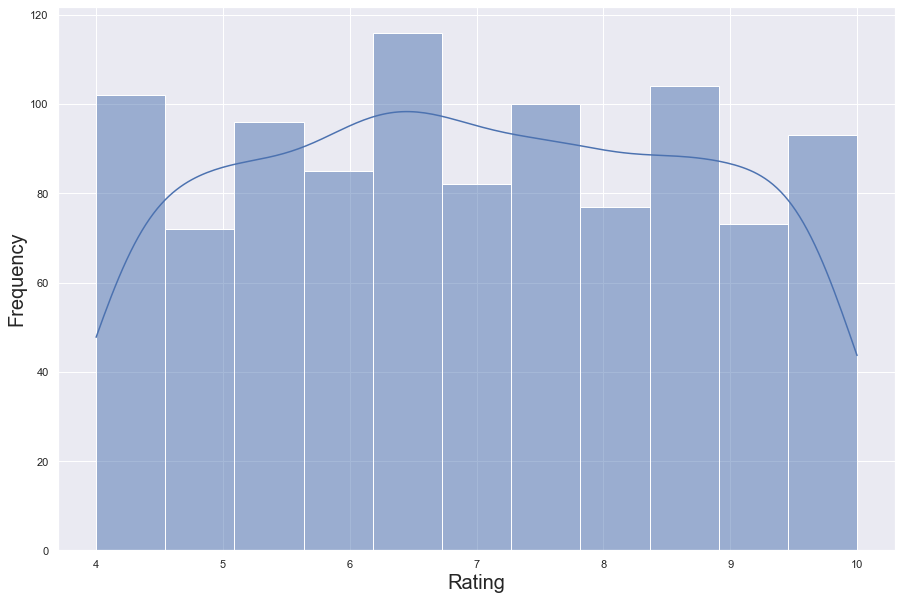

In [45]:
sns.histplot(x='Rating',kde=True,edgecolor='white' ,data=market)
plt.xlabel('Rating', fontsize=20)
plt.ylabel('Frequency', fontsize=20)

In [20]:
market.Rating.skew()

0.00900964876573073

## What can you say about the aggregate sales across the branches?

Text(0, 0.5, 'Total')

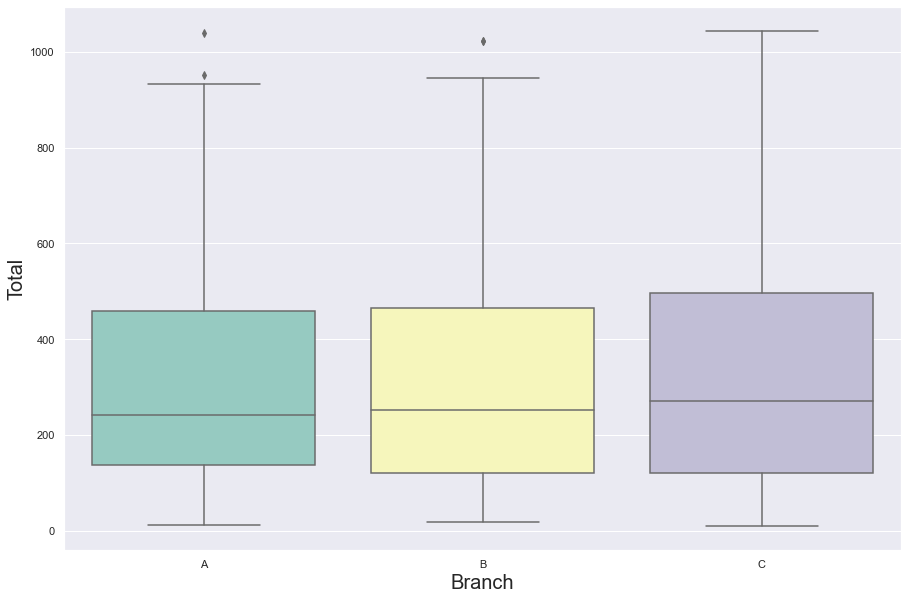

In [75]:
sns.boxplot(x='Branch', y='Total', data=market, palette='Set3')
plt.xlabel('Branch', fontsize=20)
plt.ylabel('Total', fontsize=20)

### Conclusion



## Which is the most popular payment method used by customers?

Text(0, 0.5, 'Frequency')

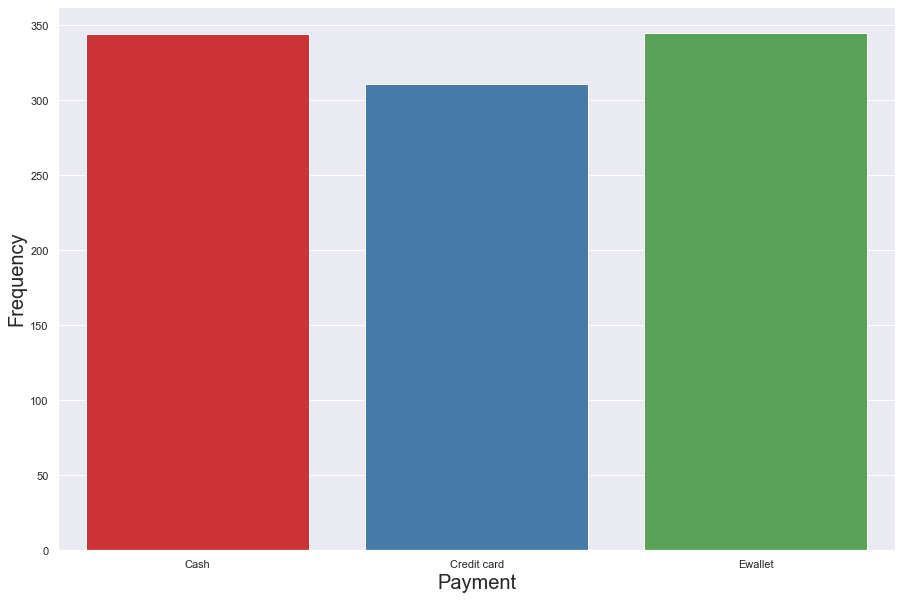

In [94]:
sns.countplot(x='Payment', data=market, palette='Set1')
plt.xlabel('Payment', fontsize=20)
plt.ylabel('Frequency', fontsize=20)

### Conclusion

Cash is the most popular payment method used by customers

## Does gross income affect customer ratings? 

Text(0, 0.5, 'gross income')

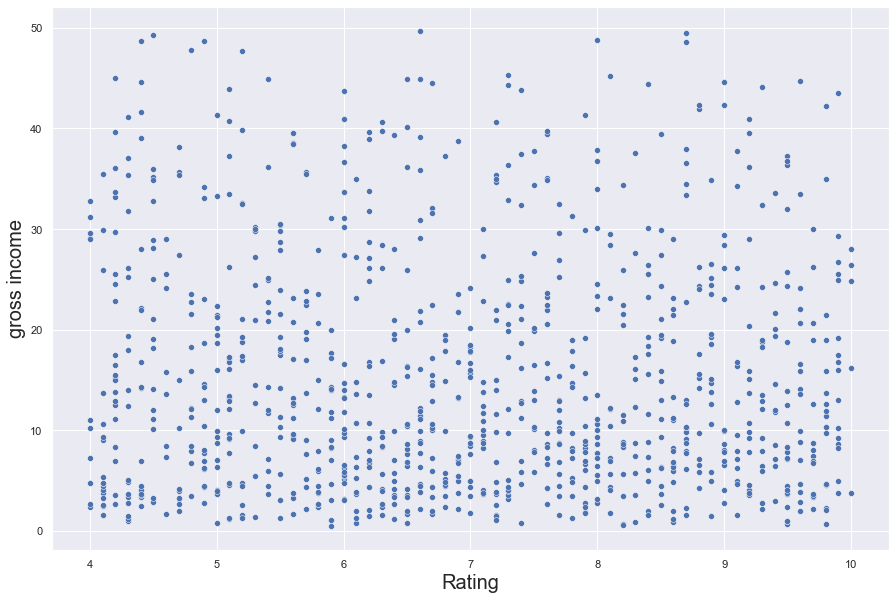

In [89]:
sns.scatterplot(x='Rating', y='gross income', data=market )
plt.xlabel('Rating', fontsize=20)
plt.ylabel('gross income', fontsize=20)

## Which is the most profitable branch? 

Text(0, 0.5, 'Total')

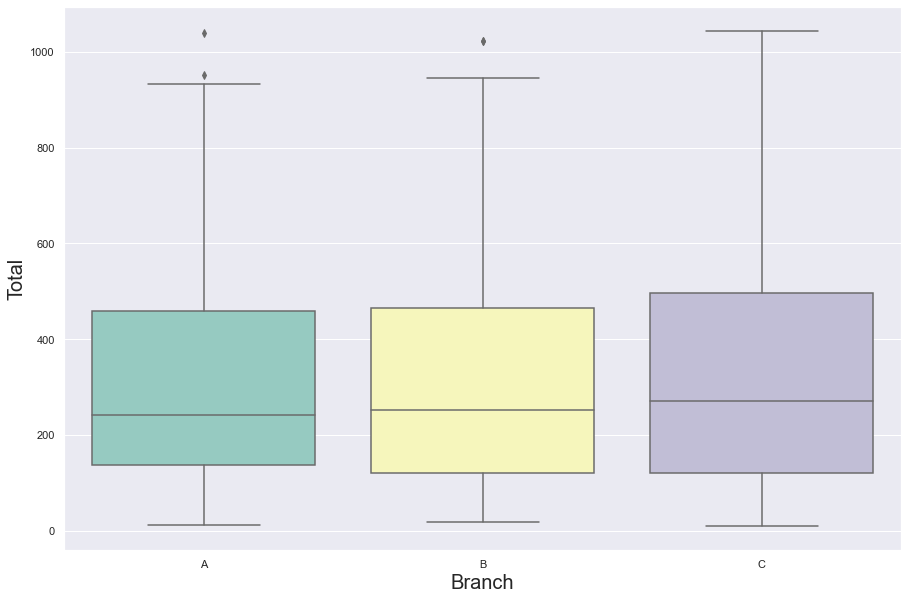

In [91]:
sns.boxplot(x='Branch', y='Total', data=market, palette='Set3')
plt.xlabel('Branch', fontsize=20)
plt.ylabel('Total', fontsize=20)

## Conclusion

**C** is the most profitable branch

## How is the relationship between Gender and Gross income? 

Text(0, 0.5, 'gross income')

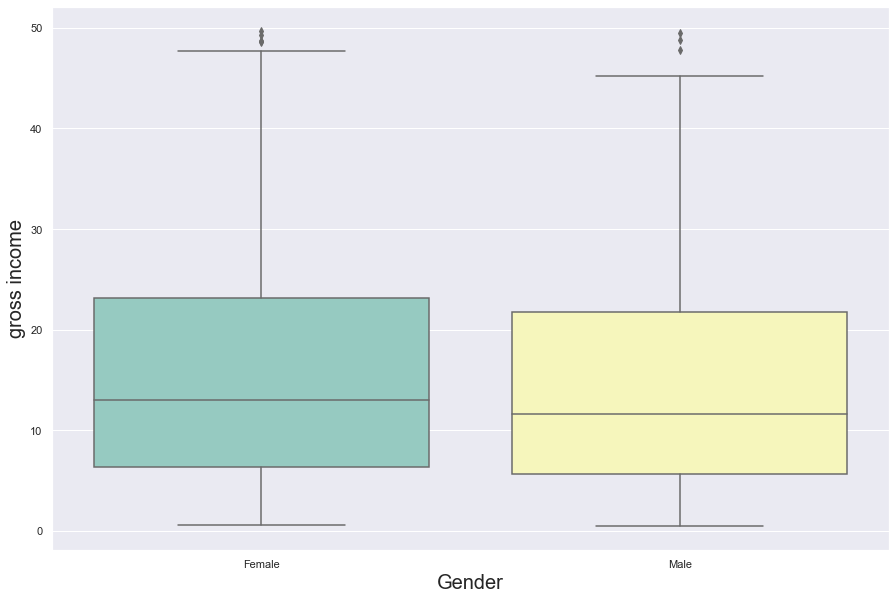

In [73]:
sns.boxplot(x='Gender', y='gross income', data=market, palette='Set3')
plt.xlabel('Gender', fontsize=20)
plt.ylabel('gross income', fontsize=20)

## Can you see any time trend in gross income? 

Text(0, 0.5, 'gross income')

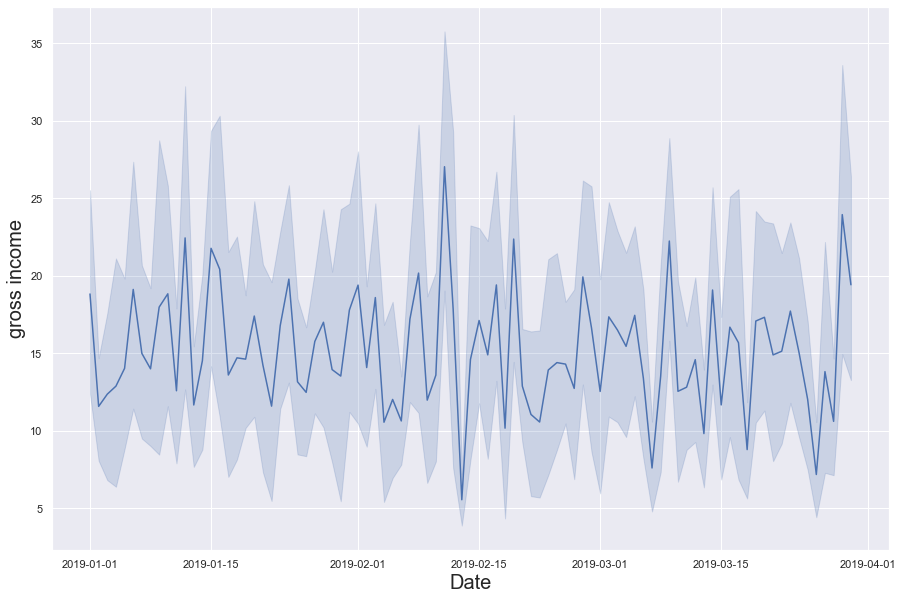

In [52]:
sns.lineplot(y='gross income', x='Date', data=market)
plt.xlabel('Date', fontsize=20)
plt.ylabel('gross income', fontsize=20)

## Which product line helps you generate the most income?

Text(0, 0.5, 'gross income')

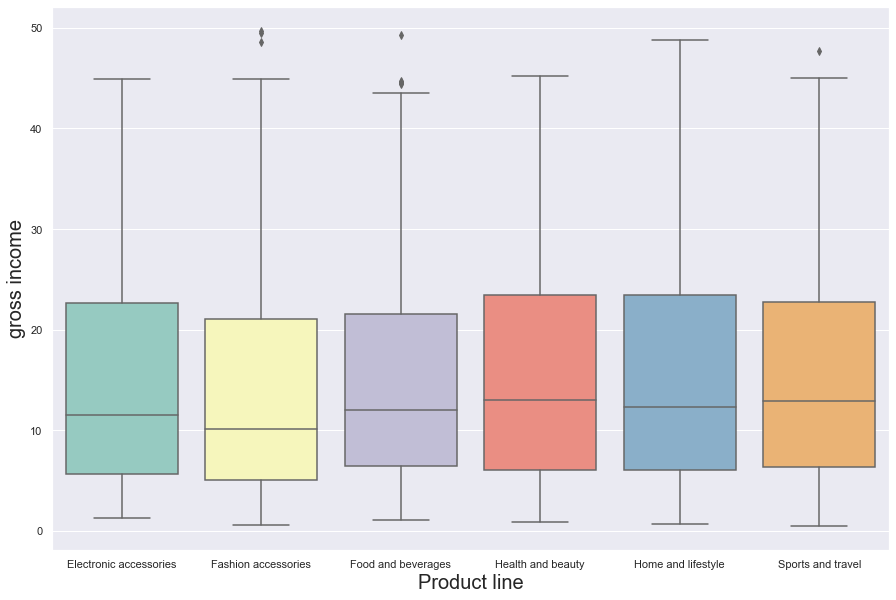

In [72]:
sns.boxplot(x='Product line', y='gross income', data=market, palette='Set3')
plt.xlabel('Product line', fontsize=20)
plt.ylabel('gross income', fontsize=20)

## Conclusion

**Health and Beauty** helps you generate the most income

## What is the spending pattern of both males and females, meaning in which category do they spend more? 

Text(0, 0.5, 'Total')

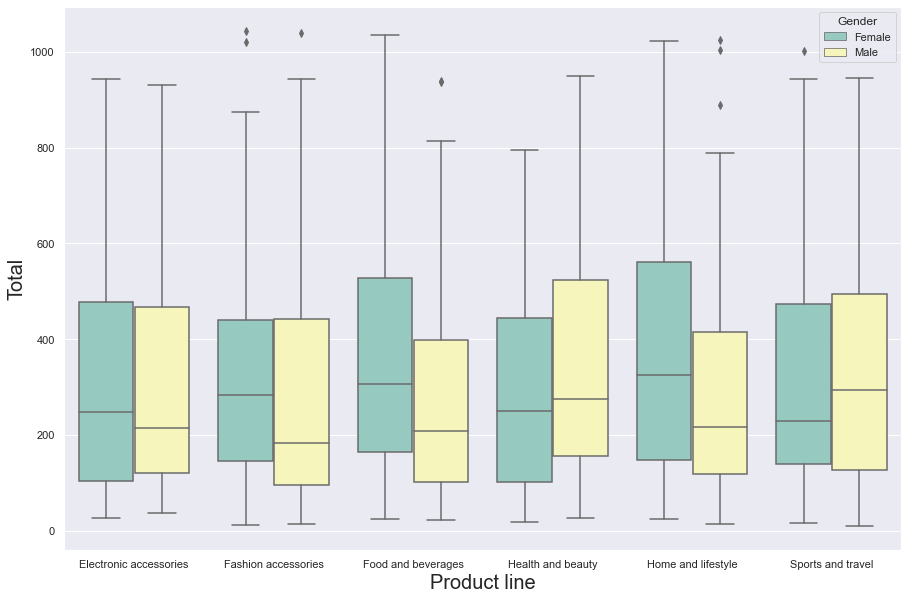

In [70]:
sns.boxplot(x='Product line', y='Total', hue='Gender' ,data= market, palette='Set3')
plt.xlabel('Product line', fontsize=20)
plt.ylabel('Total', fontsize=20)

## Conclusion

**Male** spends more in **Health and Beauty**.

**Female** spends more in **Home and lifestyle

## How many products are bought by customers?

Text(0, 0.5, 'Frequency')

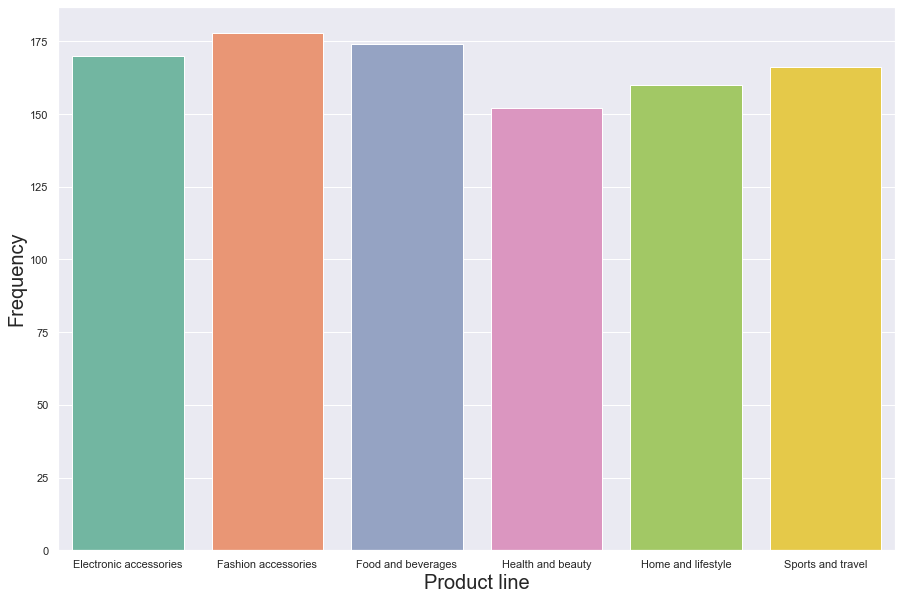

In [84]:
sns.countplot(x='Product line', data= market, palette='Set2')
plt.xlabel('Product line', fontsize=20)
plt.ylabel('Frequency', fontsize=20)

## Which day of the week has maximum sales? 


Text(0, 0.5, 'Total')

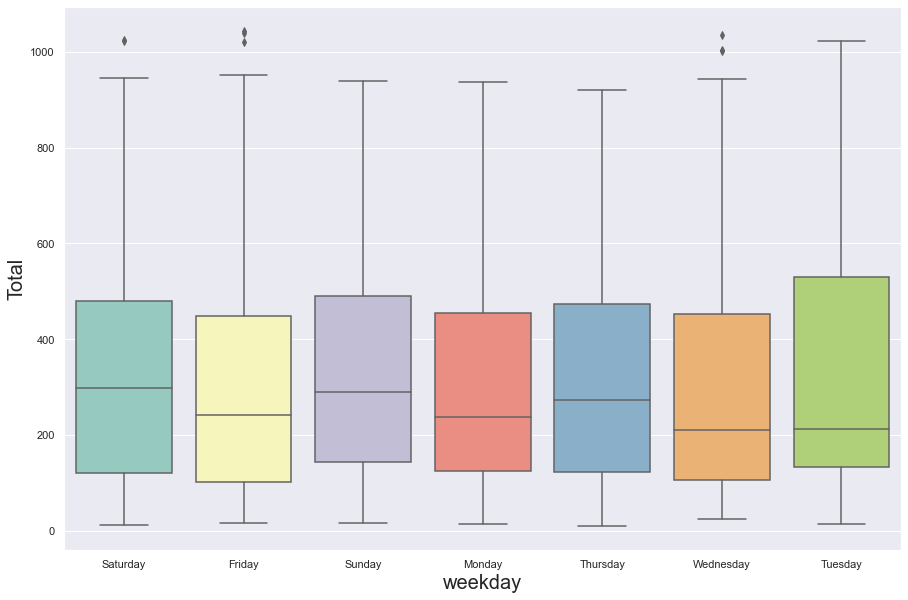

In [71]:
sns.boxplot(x='weekday', y='Total', data=market, palette='Set3')
plt.xlabel('weekday', fontsize=20)
plt.ylabel('Total', fontsize=20)

## Conclusion

**Tuesday** has the maximum sales 

## Which hour of the day is busiest? 

Text(0, 0.5, 'Total')

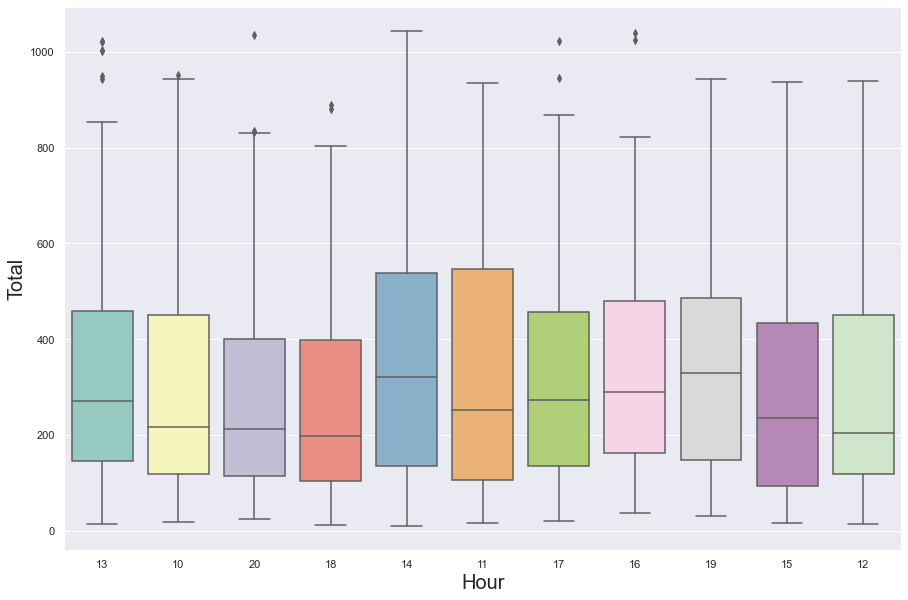

In [85]:
sns.boxplot(x='Hour', y='Total', data= market, palette='Set3')
plt.xlabel('Hour', fontsize=20)
plt.ylabel('Total', fontsize=20)

## Conclusion

**14**  hour of the day is busiest.

## Which product line should your supermarket focus on? 

Text(0, 0.5, 'Total')

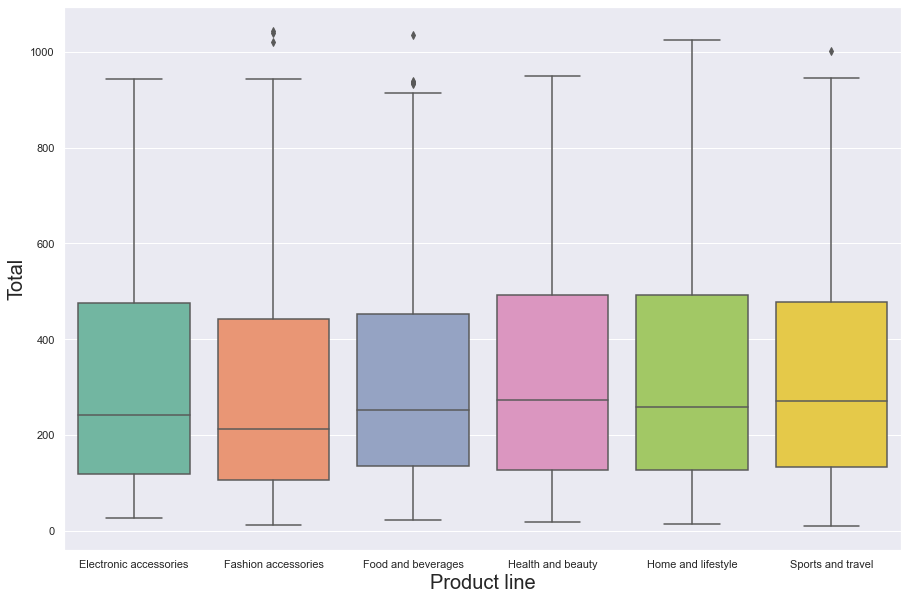

In [96]:
sns.boxplot(x='Product line', y='Total', data= market, palette='Set2')
plt.xlabel('Product line', fontsize=20)
plt.ylabel('Total', fontsize=20)

## Conclusion

Supermarket should focous on **Fashion accessories**, because as we can see the **Total** of the Fashion accessories is min.

## Which city should be chosen for expansion and what products should be focussed on?

Text(0, 0.5, 'Total')

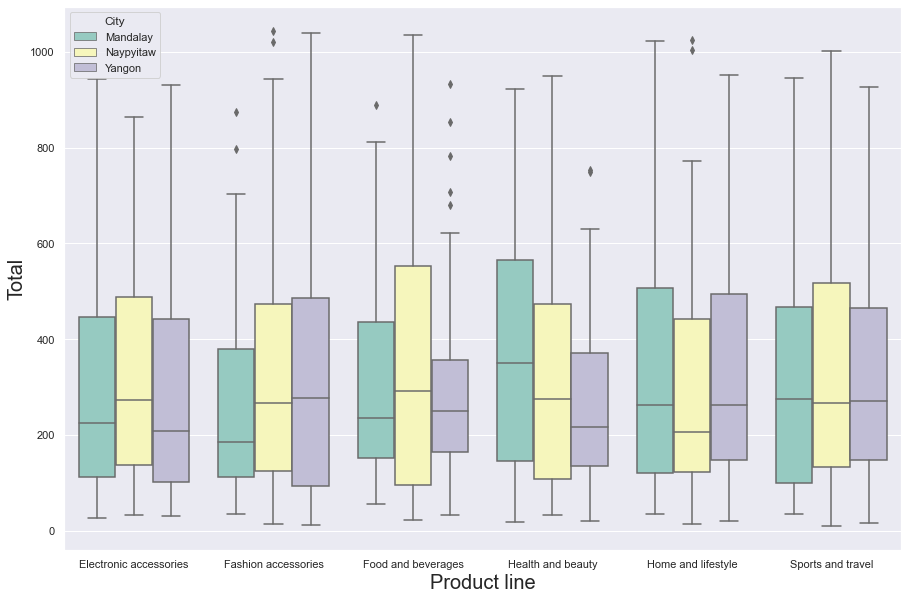

In [87]:
sns.boxplot(x='Product line', y='Total', hue='City', data=market, palette='Set3')
plt.xlabel('Product line', fontsize=20)
plt.ylabel('Total', fontsize=20)

## Conclusion 

**Mandalay** city should be chosen for expansion and **Health and beauty** products should be focussed on
